### Random Thoughts About the Cases of Interest
There are a lot of cases of interest. The goal is to use this as a diagnostic tool for calibrations. I think that there is the case which the next calibration is just "noisier" than the first. This should not really displace the mean but the spread should be higher. There is the case that one of the standards is improperly connected or has a slight difference. This should have a modified mean. There is the case that the phase of the cables changes overtime or that the measurement drifts. 

There is the comparison of two calibration techniques to identify the error adapter. 

There is the natural variation between calibrations using different connects of the standards. 

1. Look at corrections
2. Convert 4 port correction into 2 x 2-ports
3. Plot
4. Create a base calibration and vary each of the standards
5. Add Noise to each of the standards and plot difference 
6. Add a mismatch to each standard in the corrected plane

In [1]:
from pyMez import *

Importing pyMez, this should take roughly 30 seconds
Importing Code.DataHandlers.GeneralModels
It took 3.039 s to import Code.DataHandlers.GeneralModels
Importing Code.DataHandlers.HTMLModels
It took 0.514 s to import Code.DataHandlers.HTMLModels
Importing Code.DataHandlers.NISTModels
It took 12.408 s to import Code.DataHandlers.NISTModels
Importing Code.DataHandlers.TouchstoneModels
It took 0.019 s to import Code.DataHandlers.TouchstoneModels
Importing Code.DataHandlers.XMLModels
It took 0.473 s to import Code.DataHandlers.XMLModels
Importing Code.DataHandlers.ZipModels
It took 0.064 s to import Code.DataHandlers.ZipModels
Importing Code.InstrumentControl.Experiments
It took 2.413 s to import Code.InstrumentControl.Experiments
Importing Code.InstrumentControl.Instruments
It took 0.035 s to import Code.InstrumentControl.Instruments
Importing Code.Utils.Names
It took 0.023 s to import Code.Utils.Names
It took 18.988 s to import all of the active modules


In [2]:
def SixteenTerm_to_EightTermList(s4p_model):
    """Returns two s2p's of the error boxes, with s2p number 1, the same as S11,S13,S31,S33 of error adaptor and
    s2p number 2 as S22,S24,S42,S44 of error adaptor"""
    # sparameter_complex=[Frequency[0],S11[1],S12[2],S13[3],S14[4],S21[5],S22[6],S23[7],S24[8],S31[9],
    # S32[10],S33[11],S34[12],S41[13],S42[14],S43[15],S44[16]]
    s2p_1_complex=[[row[0],row[1],row[3],row[9],row[11]] for row in s4p_model.sparameter_complex]
    s2p_2_complex=[[row[0],row[6],row[8],row[14],row[16]] for row in s4p_model.sparameter_complex]
    s2p_1=S2PV1(sparameter_complex=s2p_1_complex)
    s2p_2=S2PV1(sparameter_complex=s2p_2_complex)
    return [s2p_1,s2p_2]

In [7]:
s4p=SNP(r"C:\Share\VNA_OSLT_TypeN_Room1207_2016\20160926\Solution_0.s4p")

In [8]:
error_boxes=SixteenTerm_to_EightTermList(s4p)

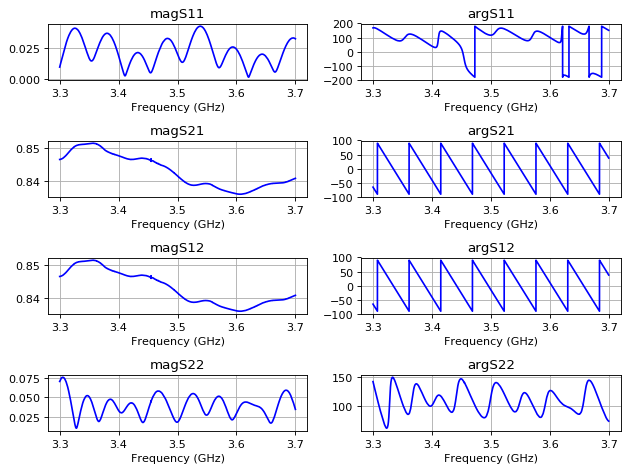

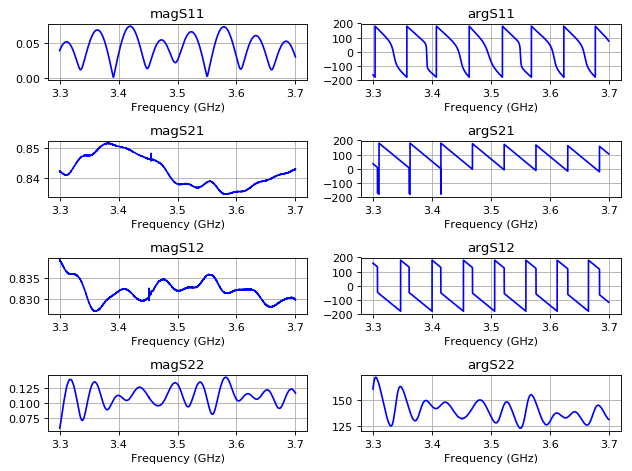

In [10]:
error_boxes[0].show();
error_boxes[1].show();

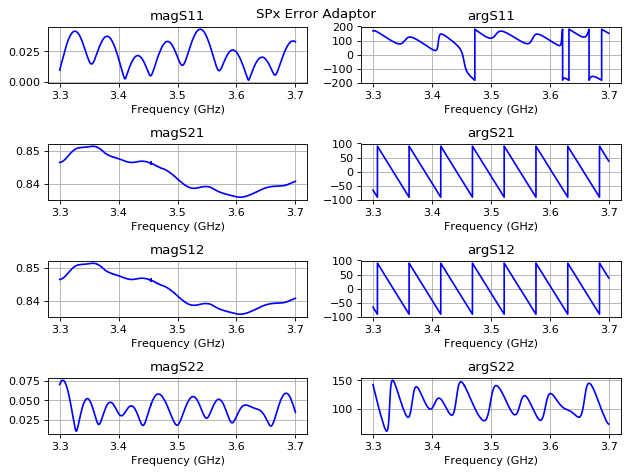

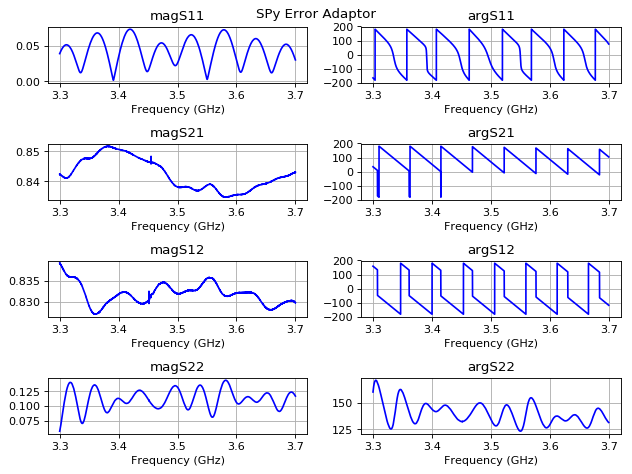

In [13]:
error_boxes[0].show(plot_title="SPx Error Adaptor");
error_boxes[1].show(plot_title="SPy Error Adaptor");

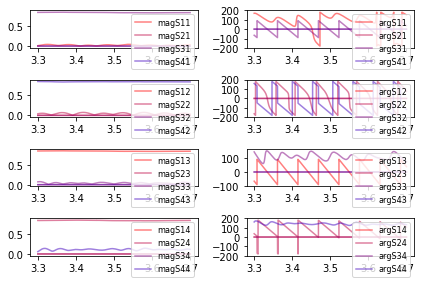

In [15]:
s4p.show();

In [16]:
s2p_attenuator=S2PV1(r"C:\Share\QuantitativeMultidimensional_20180910\ErrorAdaptorVisulations\GeneralModels\ModelSParams.s2p")

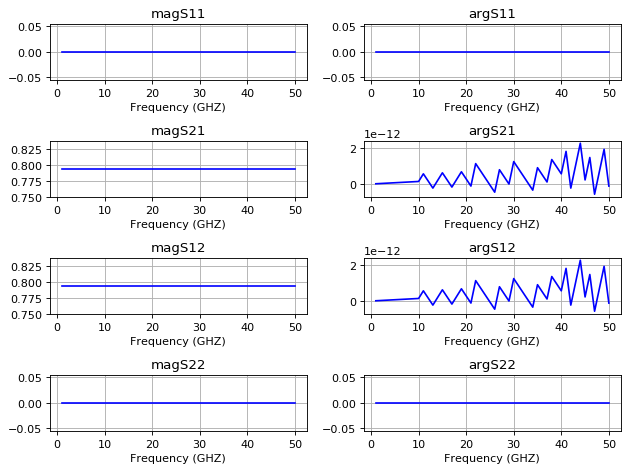

In [17]:
s2p_attenuator.show();

In [18]:
# Now we add noise to the standard measurements and then recalculate the calibration
standard_measurement_directory=r"C:\Share\QuantitativeMultidimensional_20180910\WR15\TRL_1_With_noise\Calibration_Standards_Measurements"


In [19]:
standard_measurements=os.listdir(standard_measurement_directory)

In [20]:
standard_measurements

['GTrue_Thru_WR15_Switch_Terms_20180313_001.s2p',
 'Kit_Short_P1_C15101_P2_WR15_20180313_005.s2p',
 'Line_1612_micro_m_WR15_20180313_001.s2p',
 'Line_4909_WR15_20180313_001.s2p',
 'Line_5079_WR15_20180313_001.s2p',
 'True_Thru_WR15_20180313_001.s2p']

In [28]:
# now we want noise levels from .0005 to .1 in steps of 
#noise_sigma_list=np.linspace(.0005,.1,21)

In [30]:
noise_sigma_list=[.0005,.001,.002,.005,.01,.05,.1]

In [31]:
# now we want to open each s2p, add random noise of the appropriate level and then save the new file
path_list=map(lambda x:os.path.join(standard_measurement_directory,x),standard_measurements)
s2p_list=[S2PV1(path) for path in path_list]

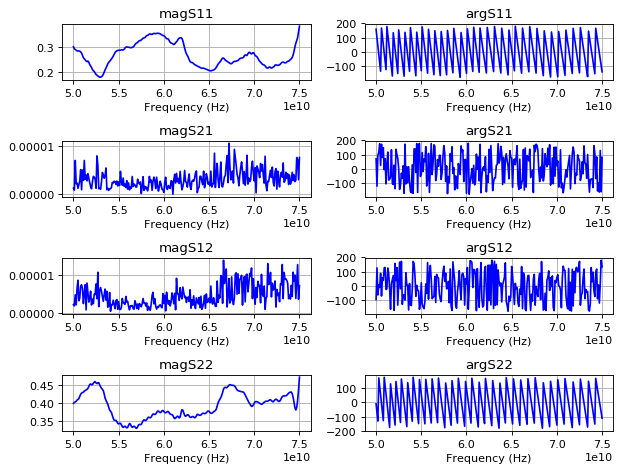

In [33]:
# now how do we want to add the noise? 
s2p_list[1].show();

In [59]:
def add_white_noise_s2p(s2p_model,noise_level=.0005):
    """Adds white noise to a s2p in RI format and returns a new s2p with the noise added to each real and imaginary component"""
    s2p_model.change_data_format("RI")
    s2p_data=s2p_model.data[:]
    noisy_data=[]
    for row in s2p_data:
        new_row=[row[0]]
        sparameters=np.array(row[1:])+np.random.normal(loc=0,scale=noise_level,size=len(row[1:]))
        new_row=new_row+sparameters.tolist()
        noisy_data.append(new_row)
    options=s2p_model.options.copy()
    options["file_path"]=None
    options["data"]=noisy_data
    options["sparameter_complex"]=[]
    noisy_s2p=S2PV1(**options)
    return noisy_s2p

In [60]:
noisy_s2p_list=map(lambda x: add_white_noise_s2p(x,noise_level=.01),s2p_list)

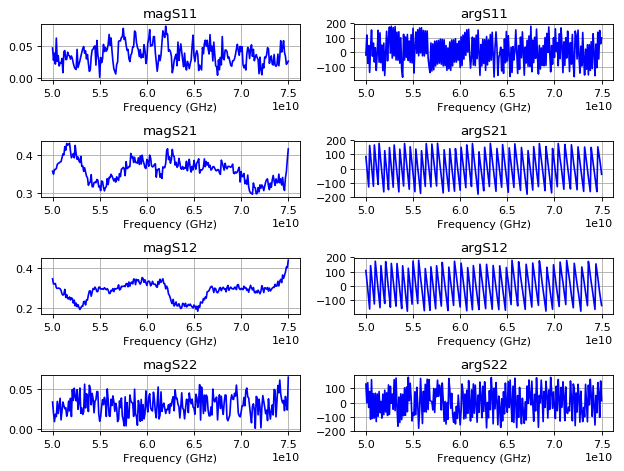

In [62]:
noisy_s2p_list[3].show();

In [42]:
s2p_data=s2p_list[1].data[:]
noise_level=.01
noisy_data=[]
for row in s2p_data:
    new_row=[row[0]]
    sparameters=np.array(row[1:])+np.random.normal(loc=0,scale=noise_level,size=len(row[1:]))
    
    new_row=new_row+sparameters.tolist()
    noisy_data.append(new_row)

In [43]:
noisy_s2p=S2PV1(data=noisy_data)

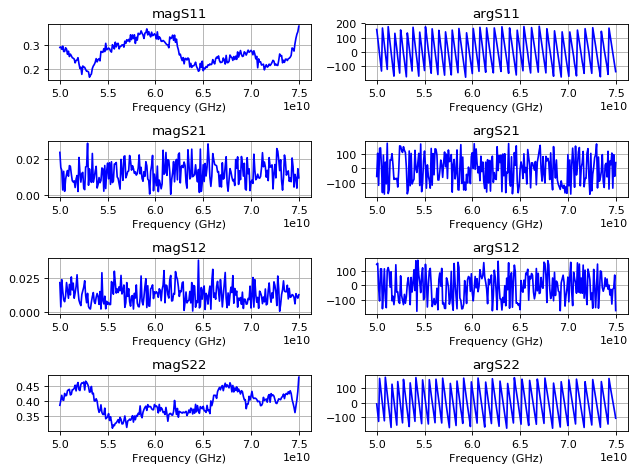

In [44]:
noisy_s2p.show();

In [40]:
s2p_diff=s2p_difference(noisy_s2p,s2p_list[1])

AttributeError: S2PV1 instance has no __call__ method

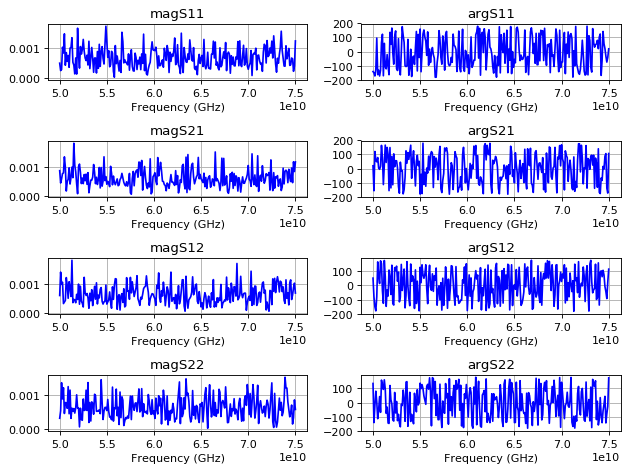

In [41]:
s2p_difference.show();

In [ ]:
# so now we have the case of adding an overall noise to the measurement
# This should be a script that adds noise and creates a new folder with the new names and then changes a template menu to 
# have new names and then runs it.

In [ ]:
# take a corrected s2p
# add a mismatch on one port
# uncorrect the data 

# what exactly is a mismatch? A line of slightly different impedence and zero length? And attenuation? 